Open THW and MHW files to identify days on which there is a co-occurring event.

Open the MSLP file to find the MSLP values on the days corresponding to co-occurring events.

Calculate average + plot

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
mhw = xr.open_dataarray('/g/data/e14/cp3790/Charuni/Tasmania/tasman-ocean-sev.nc').sel(latitude=-41.5, longitude=148.5)
thw = xr.open_dataarray('/g/data/e14/cp3790/Charuni/Tasmania/tasman-coastal-sev.nc').sel(latitude=-41.5, longitude=148.5)

In [3]:
thw_da = xr.where(thw > 1.0, 1, 0)
mhw_da = xr.where(mhw > 1.0, 1, 0)

In [6]:
add = thw_da + mhw_da
add

<xarray.DataArray 'severity' (time: 13514)>
array([0, 0, 0, ..., 2, 1, 1])
Coordinates:
    latitude   float64 -41.5
  * time       (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2018-12-31
    longitude  float64 148.5

In [8]:
# Pick out the dates where co_occ==2

co_occ_dates = add.time.loc[add==2]
co_occ_dates

<xarray.DataArray 'time' (time: 412)>
array(['1985-04-12T00:00:00.000000000', '1987-10-31T00:00:00.000000000',
       '1987-11-01T00:00:00.000000000', ..., '2018-12-27T00:00:00.000000000',
       '2018-12-28T00:00:00.000000000', '2018-12-29T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    latitude   float64 -41.5
  * time       (time) datetime64[ns] 1985-04-12 1987-10-31 ... 2018-12-29
    longitude  float64 148.5

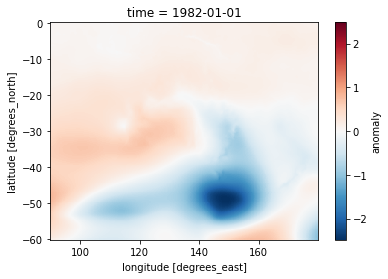

In [9]:
ds = xr.open_dataset('/g/data/e14/cp3790/Charuni/Heatwaves/msl-anomaly-aus-hpa.nc')
mslp_anom = ds.anomaly
mslp_anom.isel(time=0).plot()